In [1]:
from IPython.display import HTML
import random

def hide_toggle(for_next=False):
    this_cell = """$('div.cell.code_cell.rendered.selected')"""
    next_cell = this_cell + '.next()'

    toggle_text = 'Toggle show/hide'  # text shown on toggle link
    target_cell = this_cell  # target cell to control with toggle
    js_hide_current = ''  # bit of JS to permanently hide code in current cell (only when toggling next cell)

    if for_next:
        target_cell = next_cell
        toggle_text += ' next cell'
        js_hide_current = this_cell + '.find("div.input").hide();'

    js_f_name = 'code_toggle_{}'.format(str(random.randint(1,2**64)))

    html = """
        <script>
            function {f_name}() {{
                {cell_selector}.find('div.input').toggle();
            }}

            {js_hide_current}
        </script>

        <a href="javascript:{f_name}()">{toggle_text}</a>
    """.format(
        f_name=js_f_name,
        cell_selector=target_cell,
        js_hide_current=js_hide_current, 
        toggle_text=toggle_text
    )

    return HTML(html)
hide_toggle()

In [2]:
%autosave 0

Autosave disabled


In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import re 

In [4]:
df = pd.read_csv("survey_results_public.csv", low_memory = False)

In [5]:
df = df.replace(['Yes','No'],[True,False])

In [6]:
pd.set_option('display.max_columns', None)

# <u> 1. Data Set Description <u>


**df** is a dataset of all the responses to the Stack Overflow survey. \
Each **row** is one user's response.\
Each **column** is a question. 

> Some questions are boolean (are you a student?), some are categorical (how old are you?), and some are continuous (what is your salary?). We will get into how we cleaned problematic questions as we describe them.

Text(0.5, 1.0, 'How old are our respondents?')

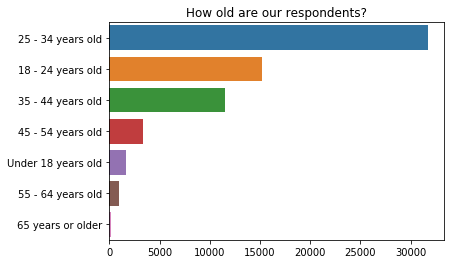

In [7]:
x = df.Age.value_counts()
sns.barplot(x.values,x.index).set_title('How old are our respondents?')
hide_toggle()

Text(0.5, 1.0, 'What is the gender of respondents?')

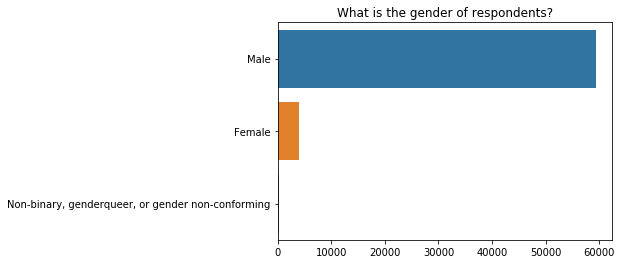

In [8]:
x = df.Gender.value_counts().head(3)
sns.barplot(x.values,x.index).set_title('What is the gender of respondents?')
hide_toggle()

Text(0.5, 1.0, 'What countries are our respondents from?')

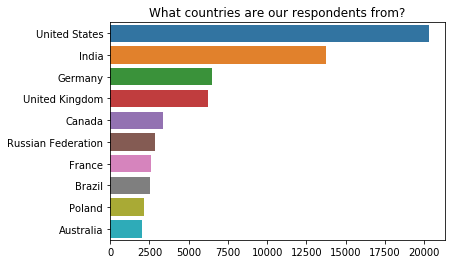

In [9]:
x = df.Country.value_counts().head(10).sort_values(ascending = False)
sns.barplot(x.values,x.index).set_title('What countries are our respondents from?')
hide_toggle()

Text(0.5, 1.0, 'What ethnicity are our respondents?')

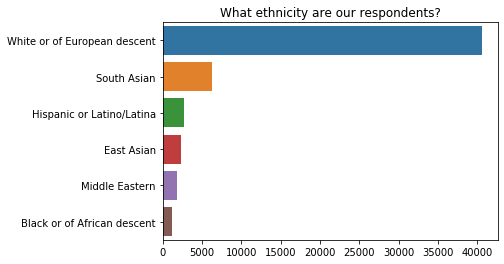

In [10]:
x = df.RaceEthnicity.value_counts().head(6).sort_values(ascending = False)
sns.barplot(x.values,x.index).set_title('What ethnicity are our respondents?')
hide_toggle()

> What if I want to look at the developer types? 

> The question DevType asks "Which of the following describe you? Please select all that apply."

In [52]:
df.DevType.value_counts().head()

Back-end developer                                             6417
Full-stack developer                                           6104
Back-end developer;Front-end developer;Full-stack developer    4460
Mobile developer                                               3518
Student                                                        3222
Name: DevType, dtype: int64

> We can see that if the respondent selects more than one developer type, they are counted as a separate value.\


>To solve this, we used the str.contains() function to count the number of times a string is mentioned. Then we stored all of the strings in an array and created a series with the count as the values and the devtypes as the index.

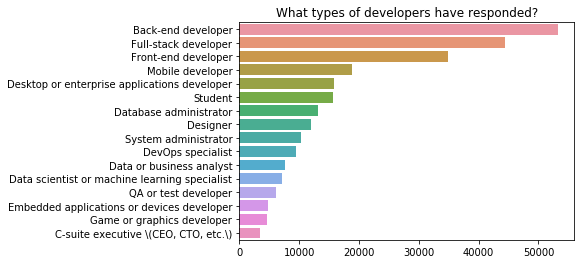

In [11]:
x = df.DevType.str.contains('Back-end developer')
x1 = len(x[x==True])

x = df.DevType.str.contains('Full-stack developer')
x2 = len(x[x==True])

x = df.DevType.str.contains('Front-end developer')
x3 = len(x[x==True])

x = df.DevType.str.contains('Mobile developer')
x4 = len(x[x==True])

x = df.DevType.str.contains('Desktop or enterprise applications developer')
x5 = len(x[x==True])

x = df.DevType.str.contains('DevOps specialist')
x6 = len(x[x==True])

x = df.DevType.str.contains('Student')
x7 = len(x[x==True])

x = df.DevType.str.contains('Designer')
x8 = len(x[x==True])

x = df.DevType.str.contains('QA or test developer')
x9 = len(x[x==True])

x = df.DevType.str.contains('Data or business analyst')
x10 = len(x[x==True])

x = df.DevType.str.contains('Database administrator')
x11 = len(x[x==True])

x = df.DevType.str.contains('Data scientist or machine learning specialist')
x12 = len(x[x==True])

x = df.DevType.str.contains('C-suite executive \(CEO, CTO, etc.\)')
x13 = len(x[x==True])

x = df.DevType.str.contains('Embedded applications or devices developer')
x14 = len(x[x==True])

x = df.DevType.str.contains('Game or graphics developer')
x15 = len(x[x==True])

x = df.DevType.str.contains('System administrator')
x16 = len(x[x==True])

data = np.array([x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16])

ser = pd.Series(data, index = ['Back-end developer',\
                              'Full-stack developer',\
                              'Front-end developer',\
                              'Mobile developer','Desktop or enterprise applications developer',\
                              'DevOps specialist','Student','Designer','QA or test developer',\
                               'Data or business analyst','Database administrator',\
                              'Data scientist or machine learning specialist',\
                              'C-suite executive \(CEO, CTO, etc.\)',\
                               'Embedded applications or devices developer','Game or graphics developer',\
                              'System administrator'])

ser = ser.sort_values(ascending = False)
x = sns.barplot(ser.values, ser.index).set_title('What types of developers have responded?')

hide_toggle()

> Moving forward, we use this same strategy for many questions that are 'check all that apply'

***

# <u> Finding 1 <u>


### For this finding, we looked at how respondents answered questions about Artificial Intelligence

1. **AIDangerous**: What do you think is the most dangerous aspect of increasingly advanced AI technology?
> - Algorithms making important decisions  
> - Artificial intelligence surpassing human intelligence ("the singularity")
> - Evolving definitions of "fairness" in algorithmic versus human decisions
> - Increasing automation of jobs
2. **AIInteresting**: What do you think is the most exciting aspect of increasingly advanced AI technology?
> - Algorithms making important decisions  
> - Artificial intelligence surpassing human intelligence ("the singularity")
> - Evolving definitions of "fairness" in algorithmic versus human decisions
> - Increasing automation of jobs
3. **AIFuture**: Overall, what's your take on the future of artificial intelligence?
> - I'm excited about the possibilities more than worried about the dangers.
> - I'm worried about the dangers more than I'm excited about the possibilities.
> - I don't care about it, or I haven't thought about it.

We created a new AI_df dataframe with relevant columns

In [12]:
AI_df = df[['Country', 'AIFuture', 'AIDangerous', 'AIInteresting']]
AI_df.head(1)

,Country,AIFuture,AIDangerous,AIInteresting
0,Kenya,I'm excited about the possibilities more than ...,Artificial intelligence surpassing human intel...,Algorithms making important decisions


Remove rows with NaN values

In [13]:
AI_df = AI_df.dropna()

>If a respondent is excited about the possibilities, they get a +1 in the AIFutureScore column. \
>If they don't care, they get +0. \
>If they are worried, the get -1. 

In [14]:
AI_df['AIFutureScore'] = AI_df['AIFuture']
AI_df.AIFutureScore.replace(["I'm excited about the possibilities more than worried about the dangers.",\
                             "I don't care about it, or I haven't thought about it.",\
                             "I'm worried about the dangers more than I'm excited about the possibilities."],[1,0,-1], inplace = True)
AI_df.head(1)

,Country,AIFuture,AIDangerous,AIInteresting,AIFutureScore
0,Kenya,I'm excited about the possibilities more than ...,Artificial intelligence surpassing human intel...,Algorithms making important decisions,1


In [15]:
AIcountry_count = AI_df.groupby('Country')['Country'].count()
AIcountry_count.sort_values(ascending = True).head(5)

Country
Burundi         1
Belize          1
Saint Lucia     1
Niger           1
Sierra Leone    1
Name: Country, dtype: int64

> We can see that many countries have only one respondent. We decided that these responses are not useful. \
Below code removes countries with less than 400 responses.

In [16]:
AI_df = AI_df[AI_df['Country'].astype('str').apply(lambda x:True if AIcountry_count[x] > 400 else False)]

>Below, each country has an AIFuture score denoting their enthusiasm for the future of AI. \
A value of 1 means the respondents feel excited about the possibilities, where 0 means they feel worried.

In [17]:
x = AI_df.groupby('Country')['AIFutureScore'].mean().sort_values(ascending = False)

In [18]:
AI_df.groupby('Country')['AIFutureScore'].mean().sort_values(ascending = False)

Country
South Africa                    0.702179
Belgium                         0.679435
Israel                          0.674115
Spain                           0.668488
Sweden                          0.668428
China                           0.640091
Denmark                         0.637931
Mexico                          0.628009
United Kingdom                  0.626785
Brazil                          0.624506
Russian Federation              0.614178
United States                   0.599302
Australia                       0.596947
Italy                           0.584677
Romania                         0.583838
Canada                          0.580961
Netherlands                     0.566410
Iran, Islamic Republic of...    0.553288
Austria                         0.546185
Switzerland                     0.537008
Turkey                          0.536804
Germany                         0.518574
France                          0.515033
Czech Republic                  0.507307
Ukraine 

### Finding Summary

>As we would expect, some countries are more ambivalent towards AI than others. However, the countries on the lower end of the scale seem to be heavily concentrated in tech powerhouses like Europe and South Asia. Pakistan especially was notably low. This was something we found to be interesting, so we decided to take a closer look at what specifically worried respondents from these countries about Artificial Intelligence. We created bar graphs for the three least favorable countries and their responses to the question about what they found to be the most dangerous aspect of AI.

>We found in the charts that most of the respondents from these countries were worried about AI replacing humans, either in the form of algorithms making all the important decisions, or AI simply surpassing human intelligence entirely. However, Pakistan specifically was once again an outlier. Its greatest fear was that jobs would become increasingly automated.

>To look further into this, we created a new series of charts, this time examining what the respondents from each country found to be the most exciting about the future of AI. Here, we saw that both Pakistan and India are most interested in the potential for algorithms to make important decisions, while every other nation was most excited by the potential for AI to automate jobs. One reason for this could be that Pakistan and India are both countries where large sections of the population work in jobs which could be most easily replaced by automation, and so have much greater reason to be worried about that. Meanwhile, the more developed economies of the European nations have less to fear from automation and might actually look forward to being able to automate less desirable tasks. 

> - To dig deeper, we decided to create charts to display each countries fears and interests in AI.

#### These graphs show the parts of AI that respondents find dangerous.

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Austria')

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Switzerland')

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Turkey')

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Germany')

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'France')

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Czech Republic')

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Ukraine')

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Poland')

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'India')

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Pakistan')

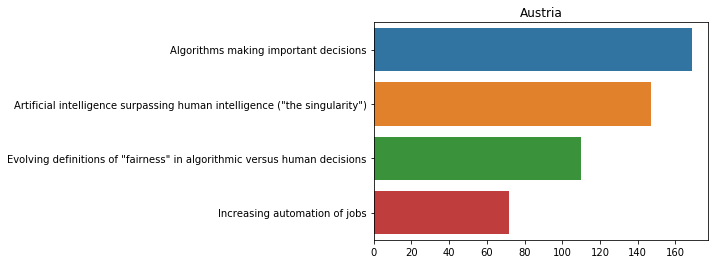

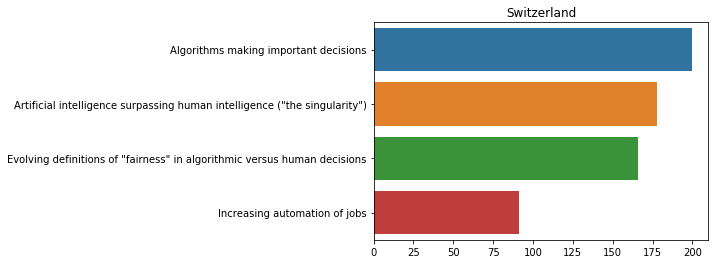

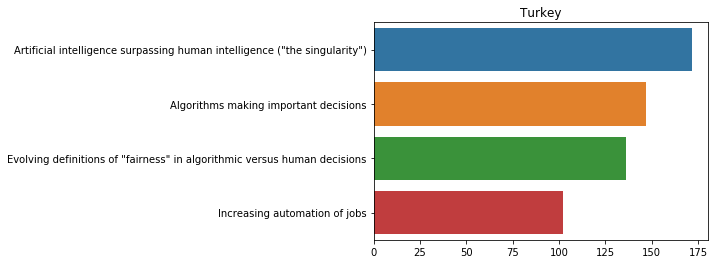

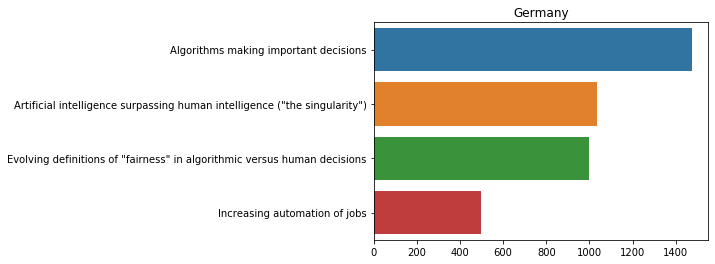

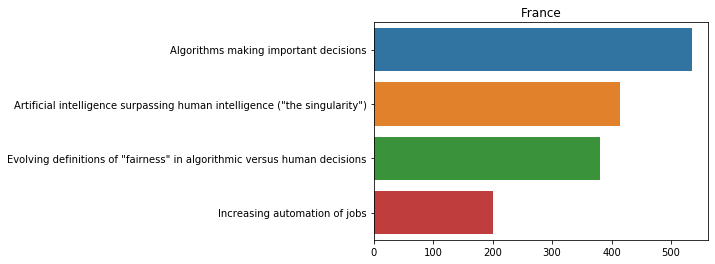

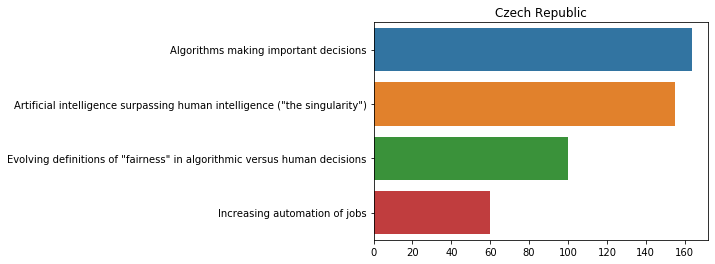

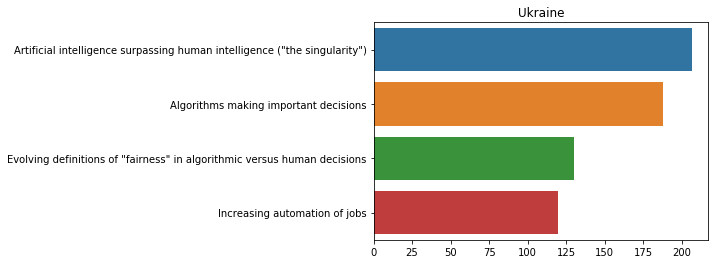

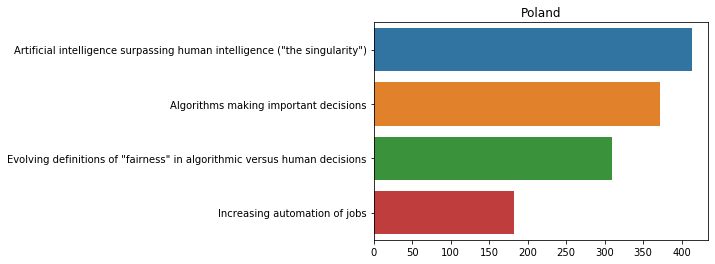

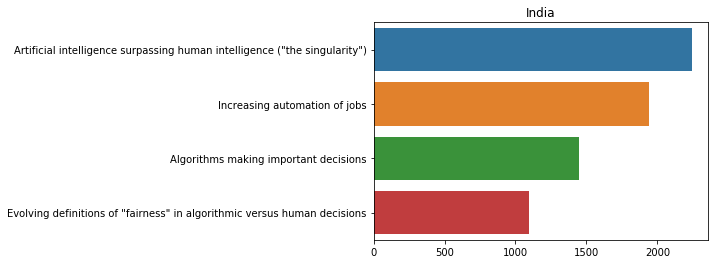

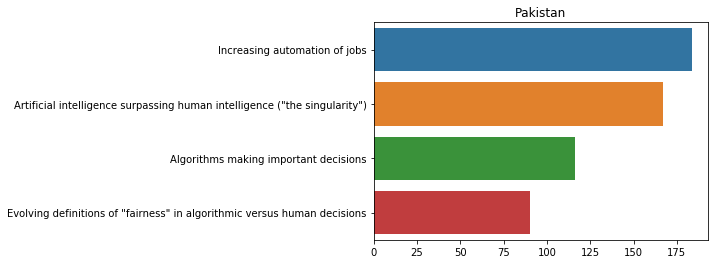

In [19]:
a = AI_df.groupby('Country')['AIFutureScore'].mean().sort_values(ascending = False).tail(10)
x = a.index
import matplotlib.pyplot as plt

for i in x:
    Series = AI_df[AI_df.Country == i]
    P = Series.AIDangerous.value_counts()
    plt.figure(i)
    sns.barplot(P.values, P.index).set_title(i)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, "Germany's AI Fears")

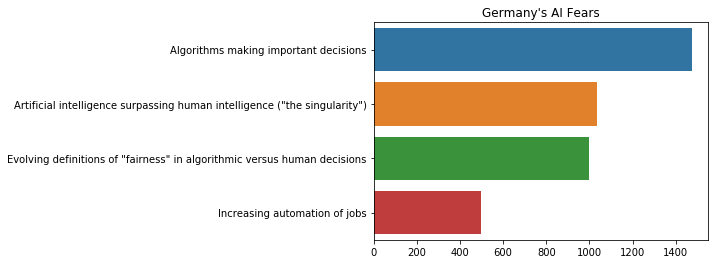

In [20]:
Series = AI_df[AI_df.Country == 'Germany']
P = Series.AIDangerous.value_counts()
plt.figure(i)
sns.barplot(P.values, P.index).set_title("Germany's AI Fears")
hide_toggle()

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, "Pakistan's AI Fears")

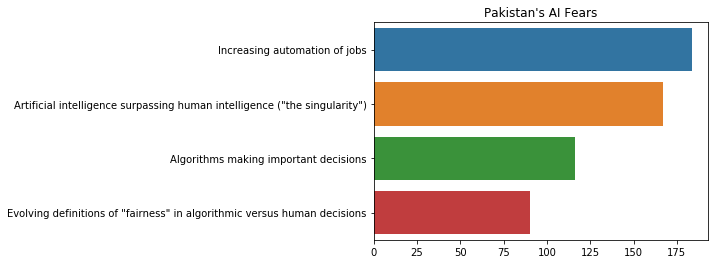

In [21]:
Series = AI_df[AI_df.Country == 'Pakistan']
P = Series.AIDangerous.value_counts()
plt.figure(i)
sns.barplot(P.values, P.index).set_title("Pakistan's AI Fears")
hide_toggle()

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Austria')

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Switzerland')

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Turkey')

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Germany')

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'France')

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Czech Republic')

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Ukraine')

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Poland')

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'India')

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Pakistan')

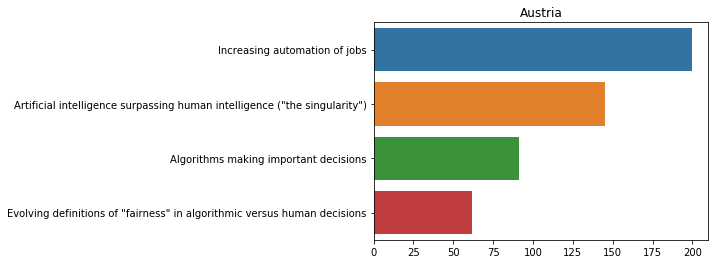

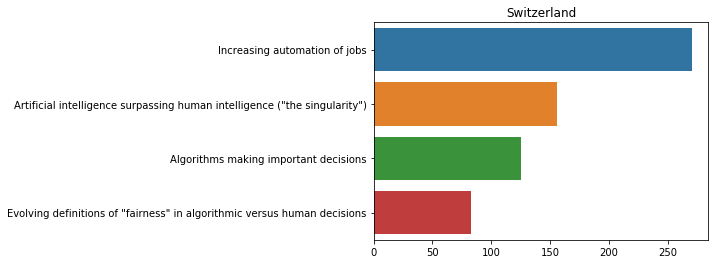

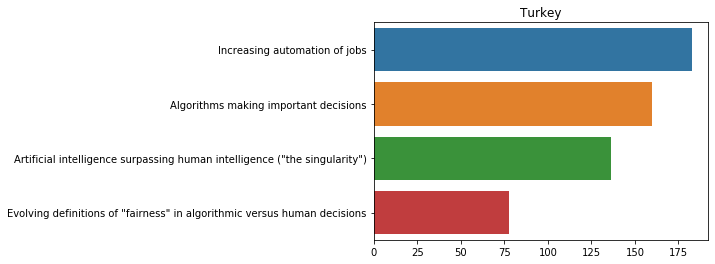

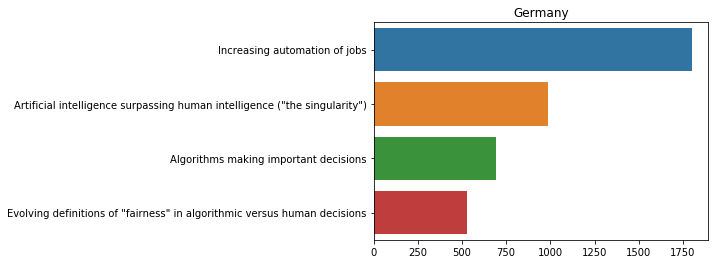

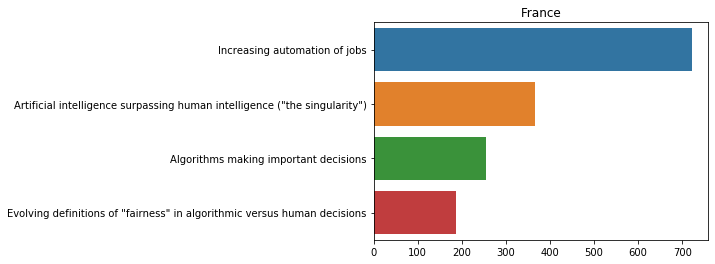

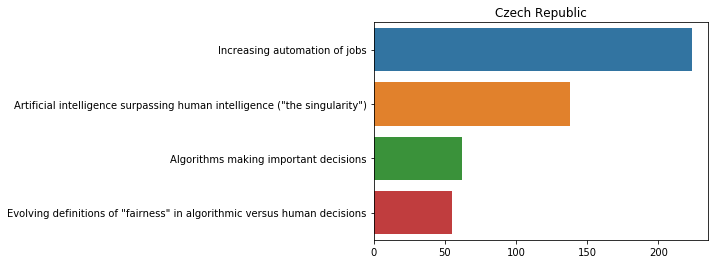

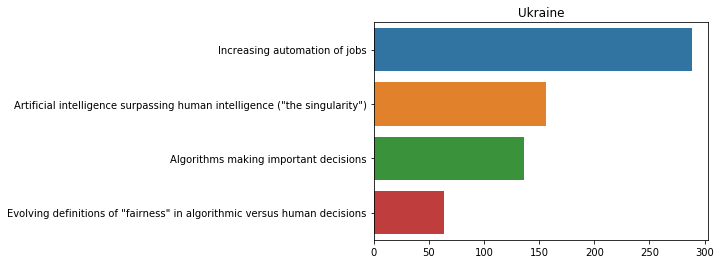

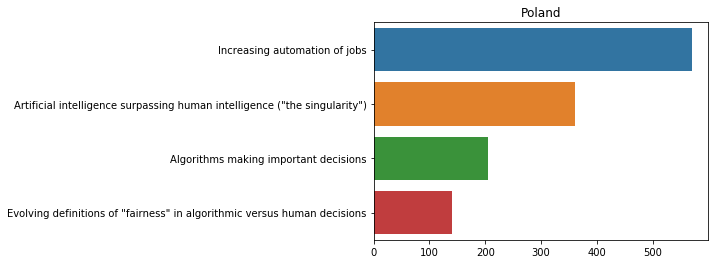

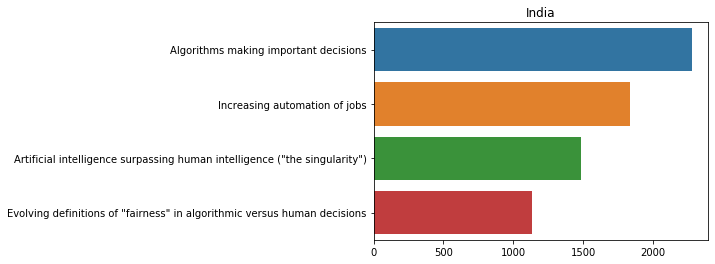

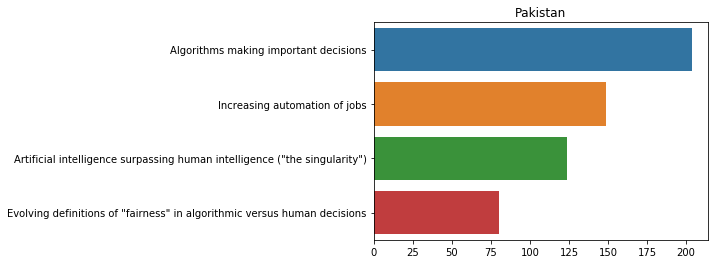

In [22]:
for i in x:
    Series = AI_df[AI_df.Country == i]
    P = Series.AIInteresting.value_counts()
    plt.figure(i)
    sns.barplot(P.values, P.index).set_title(i)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, "Pakistan's AI Interests")

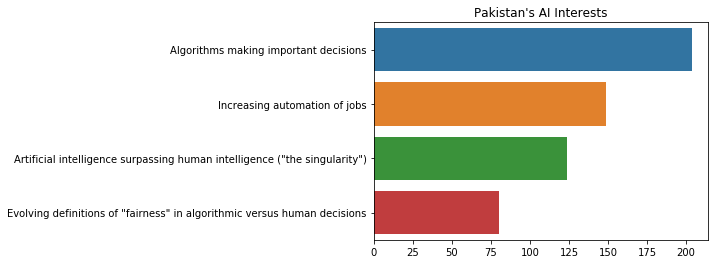

In [23]:
Series = AI_df[AI_df.Country == 'Pakistan']
P = Series.AIInteresting.value_counts()
plt.figure(i)
sns.barplot(P.values, P.index).set_title("Pakistan's AI Interests")
hide_toggle()

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, "Germany's AI Interests")

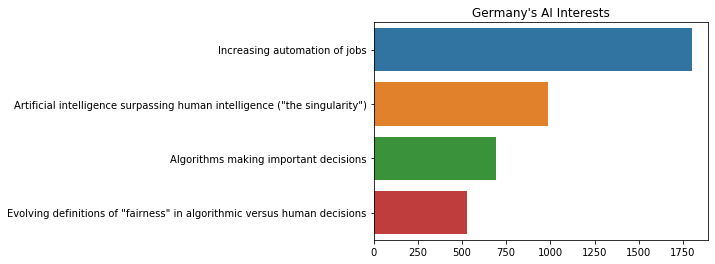

In [24]:
Series = AI_df[AI_df.Country == 'Germany']
P = Series.AIInteresting.value_counts()
plt.figure(i)
sns.barplot(P.values, P.index).set_title("Germany's AI Interests")
hide_toggle()

### Managerial Insights

>From the information we have gathered, all of the major countries are at least somewhat favorable towards AI. However, the least favorable ones have fairly well defined reasons to dislike Artificial intelligence. The most developed economies, such as the ones in Europe, are primarily worried about AI becoming so advanced that it fully replaces human decisionmaking. However, they seem to have less of an issue with jobs becoming automated. Meanwhile, less developed economies are more worried about job loss.

> This information is useful from a marketing and publicity standpoint. Many of these countries are big players in the tech industry. A tech company that works in the field of AI and is looking to expand its operations in one of these countries will need to keep up a good public image, either to market its products or to lobby governments. Thus, companies working in this area could focus their campaigns around what a country finds most interesting about AI(for instance, the potential to automate rote tasks like housecleaning in Ukraine), and try to downplay the aspects of AI that people see as the most negative.

***

# <u> Finding 2 <u>


What is Stack Overflow? \
From their website: 

>"Stack Overflow is an open community for anyone that codes. We help you get answers to your toughest coding questions, share knowledge with your coworkers in private, and find your next dream job." 

>"We build products that empower developers and connect them to solutions that enable productivity, growth, and discovery."


In [26]:
x = df.StackOverflowVisit.value_counts()

Text(0.5, 1.0, 'How frequently would you say you visit Stack Overflow?')

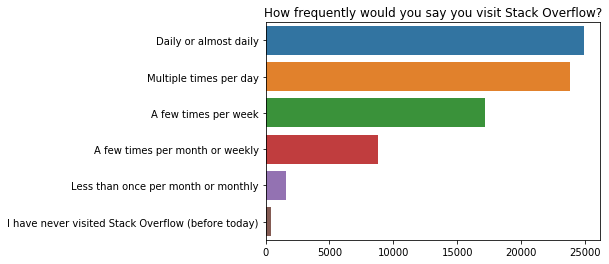

In [27]:
sns.barplot(x.values,x.index).set_title('How frequently would you say you visit Stack Overflow?')

> We will create a dataframe called 'users' that contains only those who have a stack overflow account, use stack overflow regularly and participate in Q&A

In [28]:
users = df.copy()

In [29]:
users = df[(df.StackOverflowVisit=='Daily or almost daily')| \
           (df.StackOverflowVisit == 'Multiple times per day')]

In [30]:
users = users[(users.StackOverflowHasAccount==True)]

In [31]:
users.StackOverflowVisit.value_counts()

Daily or almost daily     22275
Multiple times per day    21881
Name: StackOverflowVisit, dtype: int64

In [32]:
x = users.StackOverflowParticipate.value_counts()

Text(0.5, 1.0, 'How frequently would you say you participate in Q&A on Stack Overflow?')

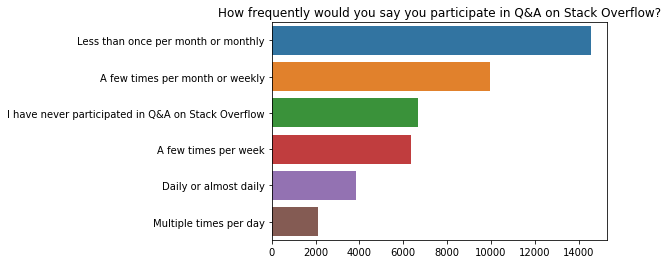

In [33]:
sns.barplot(x.values,x.index).set_title('How frequently would you say you participate in Q&A on Stack Overflow?')
hide_toggle()

In [34]:
users = users[(users.StackOverflowParticipate != 'I have never participated in Q&A on Stack Overflow')]

> Delete users who have never participated (ask, answer, vote for, comment) in Q&A

### To recap, users at this point have SO accounts, use SO regularly, and have participated in QA at least once.

#### At this point, we will look at which hypothetical tools these users would find valuable. 

The question is: \
"Please rate your interest in participating in each of the following hypothetical tools on Stack Overflow, where 1 is not at all interested and 5 is extremely interested." 
1. A peer mentoring system
2. A private area for people new to programming
3. A programming-oriented blog platform
4. An employer or job review system
5. An area for Q&A related to career growth

Text(0.5, 1.0, 'A peer mentoring system')

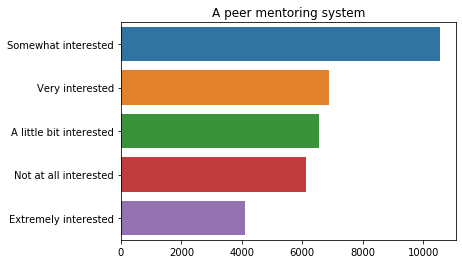

In [53]:
x = users.HypotheticalTools1.value_counts()

sns.barplot(x.values,x.index).set_title('A peer mentoring system')
hide_toggle()

Text(0.5, 1.0, 'A private area for people new to programming')

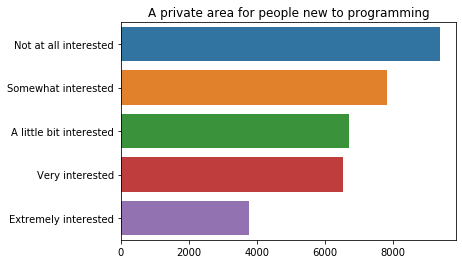

In [54]:
x = users.HypotheticalTools2.value_counts()

sns.barplot(x.values,x.index).set_title('A private area for people new to programming')
hide_toggle()

Text(0.5, 1.0, 'A programming-oriented blog platform')

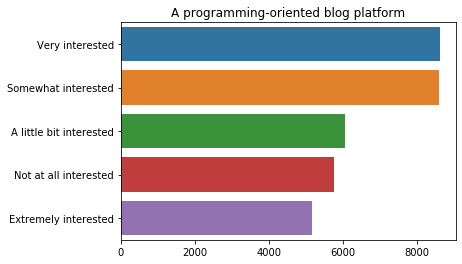

In [55]:
x = users.HypotheticalTools3.value_counts()

sns.barplot(x.values,x.index).set_title('A programming-oriented blog platform')
hide_toggle()

Text(0.5, 1.0, 'An employer or job review system')

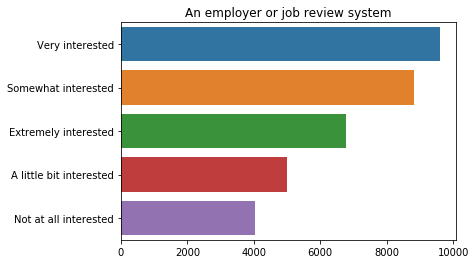

In [56]:
x = users.HypotheticalTools4.value_counts()

sns.barplot(x.values,x.index).set_title('An employer or job review system')
hide_toggle()

Text(0.5, 1.0, 'An area for Q&A related to career growth')

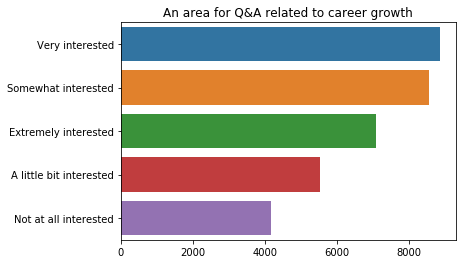

In [57]:
x = users.HypotheticalTools5.value_counts()

sns.barplot(x.values,x.index).set_title('An area for Q&A related to career growth')
hide_toggle()

> How can we compare hypothetical tool value in one graph? 

> We created boolean columns for each question where the answers 'very interested','somewhat interested' and 'extremely interested' are treated as True and 'a little bit interested' and 'not at all interested' as False

In [36]:
users['PeerMentoring'] = users['HypotheticalTools1']
users.PeerMentoring.replace(['Very interested','Somewhat interested','Extremely interested','A little bit interested',\
                 'Not at all interested',np.nan],[True,True,True,False,False,False], inplace = True)

In [37]:
users['PrivateAreaforNewb'] = users['HypotheticalTools2']
users.PrivateAreaforNewb.replace(['Very interested','Somewhat interested','Extremely interested','A little bit interested',\
                 'Not at all interested',np.nan],[True,True,True,False,False,False], inplace = True)

In [38]:
users['CodingBlog'] = users['HypotheticalTools3']
users.CodingBlog.replace(['Very interested','Somewhat interested','Extremely interested','A little bit interested',\
                 'Not at all interested',np.nan],[True,True,True,False,False,False], inplace = True)

In [39]:
users['EmployerJobReview'] = users['HypotheticalTools4']
users.EmployerJobReview.replace(['Very interested','Somewhat interested','Extremely interested','A little bit interested',\
                 'Not at all interested',np.nan],[True,True,True,False,False,False], inplace = True)

In [40]:
users['CareerQA'] = users['HypotheticalTools5']
users.CareerQA.replace(['Very interested','Somewhat interested','Extremely interested','A little bit interested',\
                 'Not at all interested',np.nan],[True,True,True,False,False,False], inplace = True)

> Store the len values into an array (i.e. x1 is the number of people who rated a hypothetical Peer Mentoring program positively)

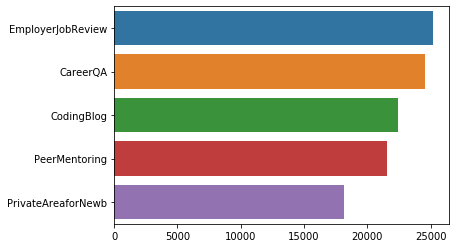

In [41]:
x1 = len(users[users.PeerMentoring==True])

x2 = len(users[users.PrivateAreaforNewb==True])

x3 = len(users[users.CodingBlog==True])

x4 = len(users[users.EmployerJobReview==True])

x5 = len(users[users.CareerQA==True])

data = np.array([x1,x2,x3,x4,x5])

ser = pd.Series(data, index = ['PeerMentoring','PrivateAreaforNewb',\
                              'CodingBlog','EmployerJobReview',\
                              'CareerQA'])

ser = ser.sort_values(ascending = False)

x = sns.barplot(ser.values, ser.index)

#### Findings for Hypothetical Tools on Stack Overflow

> - When we compare all tools, we can see that an Employer/Job review program is the #1 demanded item by Stack Overflow users. Stack Overflow may want to focus on developing this feature, along with a Career QA area or a coding blog. 

> - Stack Overflow should stay away from building a private area for new programmers or a peer mentoring system. Very few people want these features. 

> - It's important for Stack Overflow to cater to the needs of its most dedicated user base

### Languages, databases, platforms, and frameworks
> Respondents were asked which language, database, platform, and framework they have used in the past year. 

> Respondents were also asked which languages, databases, platforms, and frameworks they would like to use in the following year

In [59]:
users.LanguageWorkedWith.value_counts().head(5)

C#;JavaScript;SQL;HTML;CSS                677
JavaScript;PHP;SQL;HTML;CSS               569
Java                                      479
C#;JavaScript;SQL;TypeScript;HTML;CSS     454
JavaScript;PHP;SQL;HTML;CSS;Bash/Shell    374
Name: LanguageWorkedWith, dtype: int64

Again, we used the .str.contains() function to count each language, save to an array, save to a series, and print a graph.

### Languages:

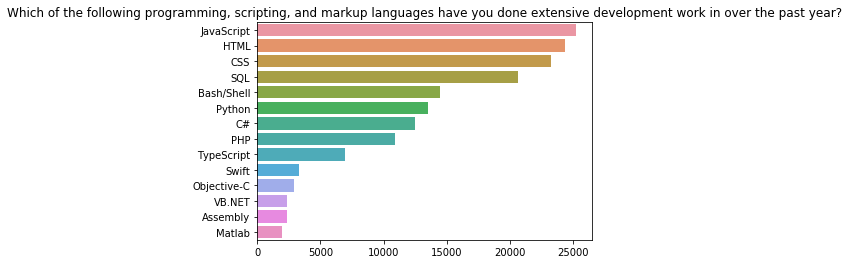

In [60]:
x = users.LanguageWorkedWith.str.contains('C#')
x1 = len(x[x==True])

x = users.LanguageWorkedWith.str.contains('JavaScript')
x2 = len(x[x==True])

x = users.LanguageWorkedWith.str.contains('SQL')
x3 = len(x[x==True])

x = users.LanguageWorkedWith.str.contains('HTML')
x4 = len(x[x==True])

x = users.LanguageWorkedWith.str.contains('CSS')
x5 = len(x[x==True])

x = users.LanguageWorkedWith.str.contains('Python')
x6 = len(x[x==True])

x = users.LanguageWorkedWith.str.contains('PHP')
x7 = len(x[x==True])

x = users.LanguageWorkedWith.str.contains('Bash/Shell')
x8 = len(x[x==True])

x = users.LanguageWorkedWith.str.contains('TypeScript')
x9 = len(x[x==True])

x = users.LanguageWorkedWith.str.contains('Objective-C')
x10 = len(x[x==True])

x = users.LanguageWorkedWith.str.contains('Swift')
x11 = len(x[x==True])

x = users.LanguageWorkedWith.str.contains('VB.NET')
x12 = len(x[x==True])

x = users.LanguageWorkedWith.str.contains('Assembly')
x13 = len(x[x==True])

x = users.LanguageWorkedWith.str.contains('Matlab')
x14 = len(x[x==True])

data = np.array([x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14])

ser = pd.Series(data, index = ['C#','JavaScript','SQL','HTML','CSS','Python','PHP','Bash/Shell','TypeScript',\
                               'Objective-C','Swift','VB.NET','Assembly','Matlab'])
ser = ser.sort_values(ascending = False)

x = sns.barplot(ser.values, ser.index).set_title('Which of the following programming, scripting, and markup languages have you done extensive development work in over the past year?')
hide_toggle()

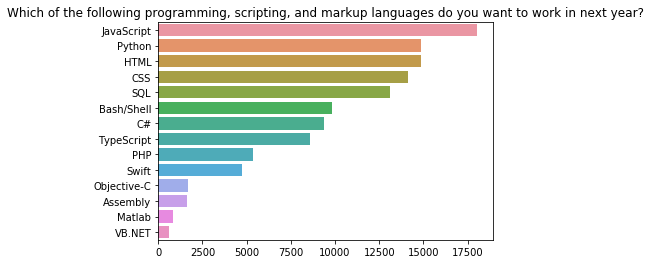

In [61]:
x = users.LanguageDesireNextYear.str.contains('C#')
x1 = len(x[x==True])

x = users.LanguageDesireNextYear.str.contains('JavaScript')
x2 = len(x[x==True])

x = users.LanguageDesireNextYear.str.contains('SQL')
x3 = len(x[x==True])

x = users.LanguageDesireNextYear.str.contains('HTML')
x4 = len(x[x==True])

x = users.LanguageDesireNextYear.str.contains('CSS')
x5 = len(x[x==True])

x = users.LanguageDesireNextYear.str.contains('Python')
x6 = len(x[x==True])

x = users.LanguageDesireNextYear.str.contains('PHP')
x7 = len(x[x==True])

x = users.LanguageDesireNextYear.str.contains('Bash/Shell')
x8 = len(x[x==True])

x = users.LanguageDesireNextYear.str.contains('TypeScript')
x9 = len(x[x==True])

x = users.LanguageDesireNextYear.str.contains('Objective-C')
x10 = len(x[x==True])

x = users.LanguageDesireNextYear.str.contains('Swift')
x11 = len(x[x==True])

x = users.LanguageDesireNextYear.str.contains('VB.NET')
x12 = len(x[x==True])

x = users.LanguageDesireNextYear.str.contains('Assembly')
x13 = len(x[x==True])

x = users.LanguageDesireNextYear.str.contains('Matlab')
x14 = len(x[x==True])

data = np.array([x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14])

ser = pd.Series(data, index = ['C#','JavaScript','SQL','HTML','CSS','Python','PHP','Bash/Shell','TypeScript',\
                               'Objective-C','Swift','VB.NET','Assembly','Matlab'])
ser = ser.sort_values(ascending = False)

x = sns.barplot(ser.values, ser.index).set_title('Which of the following programming, scripting, and markup languages do you want to work in next year?')
hide_toggle()

> Here, we can see which languages are popular today and which languages are in demand next year. 

> **Python** is 6th on the first graph, but 2nd on the second graph, telling us that many respondents are not currently using Python but are hoping to use it next year. Stack Overflow may want to dedicate extra resources to helping developers in Python due to this unmet demand.

> **VB.NET, Matlab, and Assembly language** are used by few respondents, while **JavaScript, HTML, CSS, and SQL** are both popular and in-demand for the upcoming year.

### Databases:

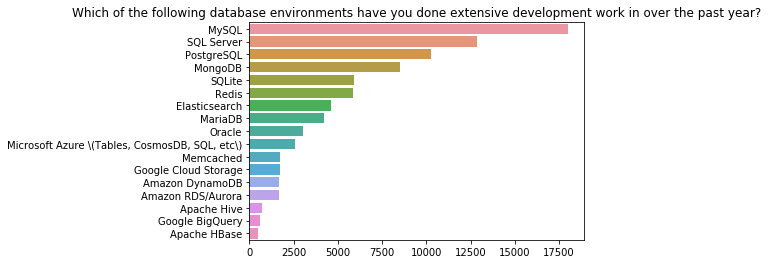

In [64]:
x = users.DatabaseWorkedWith.str.contains('MySQL')
x1 = len(x[x==True])

x = users.DatabaseWorkedWith.str.contains('SQL Server')
x2 = len(x[x==True])

x = users.DatabaseWorkedWith.str.contains('PostgreSQL')
x3 = len(x[x==True])

x = users.DatabaseWorkedWith.str.contains('SQLite')
x4 = len(x[x==True])

x = users.DatabaseWorkedWith.str.contains('MongoDB')
x5 = len(x[x==True])

x = users.DatabaseWorkedWith.str.contains('Microsoft Azure \(Tables, CosmosDB, SQL, etc\)')
x6 = len(x[x==True])

x = users.DatabaseWorkedWith.str.contains('MariaDB')
x7 = len(x[x==True])

x = users.DatabaseWorkedWith.str.contains('Redis')
x8 = len(x[x==True])

x = users.DatabaseWorkedWith.str.contains('Oracle')
x9 = len(x[x==True])

x = users.DatabaseWorkedWith.str.contains('Apache Hive')
x10 = len(x[x==True])

x = users.DatabaseWorkedWith.str.contains('Memcached')
x11 = len(x[x==True])

x = users.DatabaseWorkedWith.str.contains('Elasticsearch')
x12 = len(x[x==True])

x = users.DatabaseWorkedWith.str.contains('Apache HBase')
x13 = len(x[x==True])

x = users.DatabaseWorkedWith.str.contains('Amazon DynamoDB')
x14 = len(x[x==True])

x = users.DatabaseWorkedWith.str.contains('Google BigQuery')
x15 = len(x[x==True])

x = users.DatabaseWorkedWith.str.contains('Amazon RDS/Aurora')
x16 = len(x[x==True])

x = users.DatabaseWorkedWith.str.contains('Google Cloud Storage')
x17 = len(x[x==True])

data = np.array([x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17])

ser = pd.Series(data, index = ['MySQL','SQL Server','PostgreSQL','SQLite','MongoDB',\
                               'Microsoft Azure \(Tables, CosmosDB, SQL, etc\)','MariaDB','Redis','Oracle',\
                              'Apache Hive','Memcached','Elasticsearch','Apache HBase','Amazon DynamoDB',\
                              'Google BigQuery','Amazon RDS/Aurora','Google Cloud Storage'])
ser = ser.sort_values(ascending = False)

x = sns.barplot(ser.values, ser.index).set_title\
('Which of the following database environments have you done extensive development work in over the past year?')
hide_toggle()

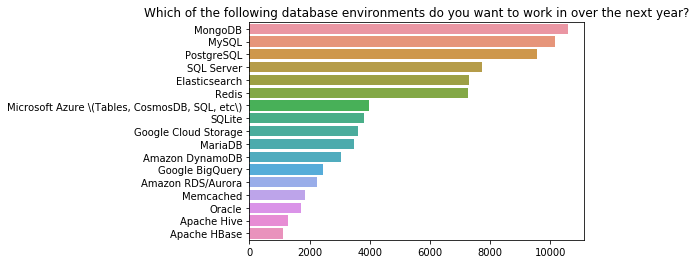

In [63]:
x = users.DatabaseDesireNextYear.str.contains('MySQL')
x1 = len(x[x==True])

x = users.DatabaseDesireNextYear.str.contains('SQL Server')
x2 = len(x[x==True])

x = users.DatabaseDesireNextYear.str.contains('PostgreSQL')
x3 = len(x[x==True])

x = users.DatabaseDesireNextYear.str.contains('SQLite')
x4 = len(x[x==True])

x = users.DatabaseDesireNextYear.str.contains('MongoDB')
x5 = len(x[x==True])

x = users.DatabaseDesireNextYear.str.contains('Microsoft Azure \(Tables, CosmosDB, SQL, etc\)')
x6 = len(x[x==True])

x = users.DatabaseDesireNextYear.str.contains('MariaDB')
x7 = len(x[x==True])

x = users.DatabaseDesireNextYear.str.contains('Redis')
x8 = len(x[x==True])

x = users.DatabaseDesireNextYear.str.contains('Oracle')
x9 = len(x[x==True])

x = users.DatabaseDesireNextYear.str.contains('Apache Hive')
x10 = len(x[x==True])

x = users.DatabaseDesireNextYear.str.contains('Memcached')
x11 = len(x[x==True])

x = users.DatabaseDesireNextYear.str.contains('Elasticsearch')
x12 = len(x[x==True])

x = users.DatabaseDesireNextYear.str.contains('Apache HBase')
x13 = len(x[x==True])

x = users.DatabaseDesireNextYear.str.contains('Amazon DynamoDB')
x14 = len(x[x==True])

x = users.DatabaseDesireNextYear.str.contains('Google BigQuery')
x15 = len(x[x==True])

x = users.DatabaseDesireNextYear.str.contains('Amazon RDS/Aurora')
x16 = len(x[x==True])

x = users.DatabaseDesireNextYear.str.contains('Google Cloud Storage')
x17 = len(x[x==True])

data = np.array([x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17])

ser = pd.Series(data, index = ['MySQL','SQL Server','PostgreSQL','SQLite','MongoDB',\
                               'Microsoft Azure \(Tables, CosmosDB, SQL, etc\)','MariaDB','Redis','Oracle',\
                              'Apache Hive','Memcached','Elasticsearch','Apache HBase','Amazon DynamoDB',\
                              'Google BigQuery','Amazon RDS/Aurora','Google Cloud Storage'])
ser = ser.sort_values(ascending = False)

x = sns.barplot(ser.values, ser.index).set_title\
('Which of the following database environments do you want to work in over the next year?')
hide_toggle()

> **MongoDB** is a very in-demand database environment which few respondents actually use today. Stack Overflow may want to dedicate extra resources to helping developers learn MongoDB.

> **Microsoft Azure, Elasticsearch, Redis** went up in ranking, showing a slight but still significant demand shift. 

> **Oracle, MariaDB, and SQLite** moved down in ranking, meaning they are slowly going out of style. 

### Platforms:

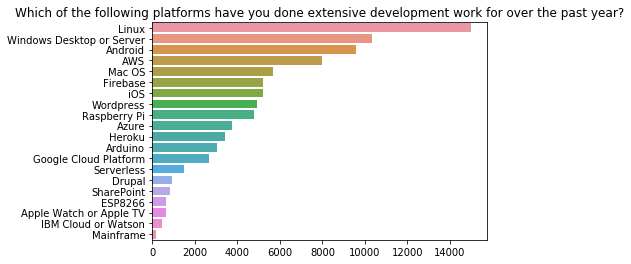

In [65]:
x = users.PlatformWorkedWith.str.contains('Windows Desktop or Server')
x1 = len(x[x==True])

x = users.PlatformWorkedWith.str.contains('Linux')
x2 = len(x[x==True])

x = users.PlatformWorkedWith.str.contains('Android')
x3 = len(x[x==True])

x = users.PlatformWorkedWith.str.contains('AWS')
x4 = len(x[x==True])

x = users.PlatformWorkedWith.str.contains('Firebase')
x5 = len(x[x==True])

x = users.PlatformWorkedWith.str.contains('WordPress')
x6 = len(x[x==True])

x = users.PlatformWorkedWith.str.contains('Mac OS')
x7 = len(x[x==True])

x = users.PlatformWorkedWith.str.contains('Azure')
x8 = len(x[x==True])

x = users.PlatformWorkedWith.str.contains('iOS')
x9 = len(x[x==True])

x = users.PlatformWorkedWith.str.contains('Raspberry Pi')
x10 = len(x[x==True])

x = users.PlatformWorkedWith.str.contains('Heroku')
x11 = len(x[x==True])

x = users.PlatformWorkedWith.str.contains('Google Cloud Platform')
x12 = len(x[x==True])

x = users.PlatformWorkedWith.str.contains('Apple Watch or Apple TV')
x13 = len(x[x==True])

x = users.PlatformWorkedWith.str.contains('IBM Cloud or Watson')
x14 = len(x[x==True])

x = users.PlatformWorkedWith.str.contains('Arduino')
x15 = len(x[x==True])

x = users.PlatformWorkedWith.str.contains('Serverless')
x16 = len(x[x==True])

x = users.PlatformWorkedWith.str.contains('Drupal')
x17 = len(x[x==True])

x = users.PlatformWorkedWith.str.contains('ESP8266')
x18 = len(x[x==True])

x = users.PlatformWorkedWith.str.contains('SharePoint')
x19 = len(x[x==True])

x = users.PlatformWorkedWith.str.contains('Mainframe')
x20 = len(x[x==True])

data = np.array([x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20])

ser = pd.Series(data, index = ['Windows Desktop or Server','Linux','Android','AWS','Firebase','Wordpress',\
                              'Mac OS','Azure','iOS','Raspberry Pi','Heroku','Google Cloud Platform',\
                              'Apple Watch or Apple TV','IBM Cloud or Watson','Arduino','Serverless',\
                              'Drupal','ESP8266','SharePoint','Mainframe'])
ser = ser.sort_values(ascending = False)

x = sns.barplot(ser.values, ser.index).set_title\
('Which of the following platforms have you done extensive development work for over the past year?')
hide_toggle()

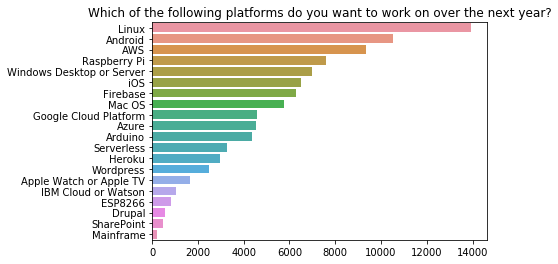

In [66]:
x = users.PlatformDesireNextYear.str.contains('Windows Desktop or Server')
x1 = len(x[x==True])

x = users.PlatformDesireNextYear.str.contains('Linux')
x2 = len(x[x==True])

x = users.PlatformDesireNextYear.str.contains('Android')
x3 = len(x[x==True])

x = users.PlatformDesireNextYear.str.contains('AWS')
x4 = len(x[x==True])

x = users.PlatformDesireNextYear.str.contains('Firebase')
x5 = len(x[x==True])

x = users.PlatformDesireNextYear.str.contains('WordPress')
x6 = len(x[x==True])

x = users.PlatformDesireNextYear.str.contains('Mac OS')
x7 = len(x[x==True])

x = users.PlatformDesireNextYear.str.contains('Azure')
x8 = len(x[x==True])

x = users.PlatformDesireNextYear.str.contains('iOS')
x9 = len(x[x==True])

x = users.PlatformDesireNextYear.str.contains('Raspberry Pi')
x10 = len(x[x==True])

x = users.PlatformDesireNextYear.str.contains('Heroku')
x11 = len(x[x==True])

x = users.PlatformDesireNextYear.str.contains('Google Cloud Platform')
x12 = len(x[x==True])

x = users.PlatformDesireNextYear.str.contains('Apple Watch or Apple TV')
x13 = len(x[x==True])

x = users.PlatformDesireNextYear.str.contains('IBM Cloud or Watson')
x14 = len(x[x==True])

x = users.PlatformDesireNextYear.str.contains('Arduino')
x15 = len(x[x==True])

x = users.PlatformDesireNextYear.str.contains('Serverless')
x16 = len(x[x==True])

x = users.PlatformDesireNextYear.str.contains('Drupal')
x17 = len(x[x==True])

x = users.PlatformDesireNextYear.str.contains('ESP8266')
x18 = len(x[x==True])

x = users.PlatformDesireNextYear.str.contains('SharePoint')
x19 = len(x[x==True])

x = users.PlatformDesireNextYear.str.contains('Mainframe')
x20 = len(x[x==True])

data = np.array([x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20])

ser = pd.Series(data, index = ['Windows Desktop or Server','Linux','Android','AWS','Firebase','Wordpress',\
                              'Mac OS','Azure','iOS','Raspberry Pi','Heroku','Google Cloud Platform',\
                              'Apple Watch or Apple TV','IBM Cloud or Watson','Arduino','Serverless',\
                              'Drupal','ESP8266','SharePoint','Mainframe'])
ser = ser.sort_values(ascending = False)

x = sns.barplot(ser.values, ser.index).set_title\
('Which of the following platforms do you want to work on over the next year?')
hide_toggle()

> **AWS, Google Cloud Platform, and Raspberry Pi** ranked up significantly. Stack Overflow may want to consider emphasizing these platforms.

> **Windows Desktop or Server and Mac OS** dropped slightly, perhaps reflecting a trend towards mobile devices and away from desktop computers.

> Although **Linux** is overwhelmingly the most popular, many people are already using it. Stack Overflow should perhaps dig a little deeper in future surveys to see how many resources to dedicate to Linux. 

### Frameworks:

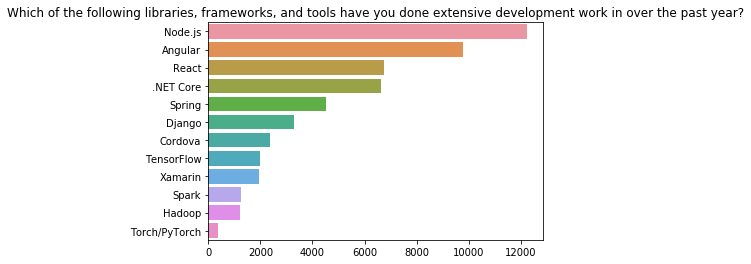

In [68]:
x = users.FrameworkWorkedWith.str.contains('.NET Core')
x1 = len(x[x==True])

x = users.FrameworkWorkedWith.str.contains('Node.js')
x2 = len(x[x==True])

x = users.FrameworkWorkedWith.str.contains('React')
x3 = len(x[x==True])

x = users.FrameworkWorkedWith.str.contains('Spring')
x4 = len(x[x==True])

x = users.FrameworkWorkedWith.str.contains('Hadoop')
x5 = len(x[x==True])

x = users.FrameworkWorkedWith.str.contains('Torch/PyTorch')
x6 = len(x[x==True])

x = users.FrameworkWorkedWith.str.contains('TensorFlow')
x7 = len(x[x==True])

x = users.FrameworkWorkedWith.str.contains('Angular')
x8 = len(x[x==True])

x = users.FrameworkWorkedWith.str.contains('Django')
x9 = len(x[x==True])

x = users.FrameworkWorkedWith.str.contains('Cordova')
x10 = len(x[x==True])

x = users.FrameworkWorkedWith.str.contains('Xamarin')
x11 = len(x[x==True])

x = users.FrameworkWorkedWith.str.contains('Spark')
x12 = len(x[x==True])

data = np.array([x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12])

ser = pd.Series(data, index = ['.NET Core','Node.js','React','Spring','Hadoop','Torch/PyTorch','TensorFlow',\
                              'Angular','Django','Cordova','Xamarin','Spark'])
ser = ser.sort_values(ascending = False)

x = sns.barplot(ser.values, ser.index).set_title\
('Which of the following libraries, frameworks, and tools have you done extensive development work in over the past year?')
hide_toggle()

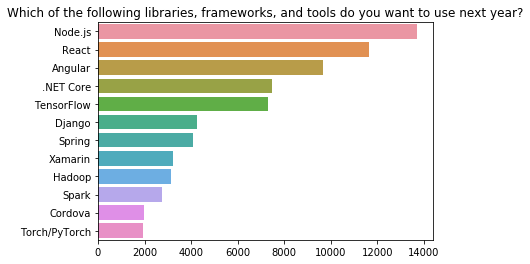

In [69]:
x = users.FrameworkDesireNextYear.str.contains('.NET Core')
x1 = len(x[x==True])

x = users.FrameworkDesireNextYear.str.contains('Node.js')
x2 = len(x[x==True])

x = users.FrameworkDesireNextYear.str.contains('React')
x3 = len(x[x==True])

x = users.FrameworkDesireNextYear.str.contains('Spring')
x4 = len(x[x==True])

x = users.FrameworkDesireNextYear.str.contains('Hadoop')
x5 = len(x[x==True])

x = users.FrameworkDesireNextYear.str.contains('Torch/PyTorch')
x6 = len(x[x==True])

x = users.FrameworkDesireNextYear.str.contains('TensorFlow')
x7 = len(x[x==True])

x = users.FrameworkDesireNextYear.str.contains('Angular')
x8 = len(x[x==True])

x = users.FrameworkDesireNextYear.str.contains('Django')
x9 = len(x[x==True])

x = users.FrameworkDesireNextYear.str.contains('Cordova')
x10 = len(x[x==True])

x = users.FrameworkDesireNextYear.str.contains('Xamarin')
x11 = len(x[x==True])

x = users.FrameworkDesireNextYear.str.contains('Spark')
x12 = len(x[x==True])

data = np.array([x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12])

ser = pd.Series(data, index = ['.NET Core','Node.js','React','Spring','Hadoop','Torch/PyTorch','TensorFlow',\
                              'Angular','Django','Cordova','Xamarin','Spark'])
ser = ser.sort_values(ascending = False)

x = sns.barplot(ser.values, ser.index).set_title\
('Which of the following libraries, frameworks, and tools do you want to use next year?')
hide_toggle()

> **TensorFlow** ranked up significantly, showing an increased interest in that framework. Stack Overflow may consider dedicating extra resources to this framework. 

> **Cordova** fell significantly, showing that this platform may slowly become obsolete. 

### Managerial Insights for Stack Overflow

> When considering where to dedicate resources, Stack Overflow should focus on the those who **have accounts, use Stack Overflow regularly, and have participated before** (users dataframe)

> Our data shows that:

> - **JavaScript, HTML, CSS, and Python** are the most popular languages, with **Python** being the most in-demand. 

> - **